In [1]:
# First things first, we have to install some python libraries so that our program works

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import csv

To meet our need, we have to go through different steps:

---> Data analysis: data processing, data cleaning, exploratory analysis and relevant graphics
---> "Feature selection": 
Engineering of characteristics, pruning of characteristics and justification of choices;
---> "Model Training": Model selection and justification and comparison with other models;
---> "Model evaluation": Measurement and interpretation of results;
---> Project Report

Looading the database : 

Our data is available in a tabular format of CSV files. we'll use the convert it to a pandas DataFrame using the read_csv function.

In [2]:
data = 'C:/Users/selfe/Documents/DSTI/machine_learning/Project-20221116/books.csv'

books = pd.read_csv(data, sep=",",index_col="bookID", skipinitialspace=True, on_bad_lines='warn')

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
# extract a row 3350 from the data
books.iloc[3350]

title                                                         Pygmalion
authors               George Bernard Shaw/Dan H. Laurence/Nicholas G...
average_rating                                                      3.9
isbn                                                         0141439505
isbn13                                                    9780141439501
language_code                                                       eng
num_pages                                                           122
ratings_count                                                      2085
text_reviews_count                                                  179
publication_date                                              1/30/2003
publisher                                                 Penguin Books
Name: 12230, dtype: object

In [4]:
# extract a row 5879 from the data
books.iloc[5879]

title                 Homepage Usability: 50 Websites Deconstructed
authors                                   Jakob Nielsen/Marie Tahir
average_rating                                                 3.74
isbn                                                     073571102X
isbn13                                                9780735711020
language_code                                                   eng
num_pages                                                       336
ratings_count                                                   341
text_reviews_count                                               12
publication_date                                         11/15/2001
publisher                                     New Riders Publishing
Name: 22148, dtype: object

In [5]:
# extract a row 8981 from the data
books.iloc[8981]

title                 Must Love Dragons (Immortally Sexy  #2)
authors                                        Stephanie Rowe
average_rating                                           3.98
isbn                                               0446617679
isbn13                                          9780446617673
language_code                                           en-US
num_pages                                                 342
ratings_count                                            1740
text_reviews_count                                         77
publication_date                                    11/1/2006
publisher                                      Warner Forever
Name: 34901, dtype: object

1. The dataset contains some rows with more columns than expected
2. we noticed that in the dataset, there were books with authors splited into 2 columns
3. We make some reseach and find a script to resolve this.

In [6]:
      


books = pd.read_csv(data, index_col="bookID", warn_bad_lines=True, error_bad_lines=False, encoding='utf-8')


C:\Users\selfe\AppData\Local\Temp\ipykernel_24356\3923865578.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv(data, index_col="bookID", warn_bad_lines=True, error_bad_lines=False, encoding='utf-8')
C:\Users\selfe\AppData\Local\Temp\ipykernel_24356\3923865578.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv(data, index_col="bookID", warn_bad_lines=True, error_bad_lines=False, encoding='utf-8')
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [7]:
books.head(12)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books


In [8]:
# Let's examine the last 10 entries:
books.tail(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,9722330551,9789722330558,por,160,207,16,8/15/2003,Editorial Presença
45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,9722329987,9789722329989,por,147,396,37,4/8/2003,Editorial Presença
45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,9722331329,9789722331326,por,176,161,14,9/1/2004,Editorial Presença
45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,9722330977,9789722330978,por,160,215,11,10/11/2003,Editorial Presença
45630,Whores for Gloria,William T. Vollmann,3.69,0140231579,9780140231571,en-US,160,932,111,2/1/1994,Penguin Books
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [9]:
# prints information about the DataFrame with Pandas DataFrame info() Method
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6     num_pages         11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [10]:
# The info() method allows us to learn the shape of object types of our data but we also need a summary statistics for numerical columns in our DataFrame.

books.describe(include='object').T

,count,unique,top,freq
title,11123,10348,The Iliad,9
authors,11123,6639,Stephen King,40
isbn,11123,11123,0439785960,1
language_code,11123,27,eng,8908
publication_date,11123,3679,10/1/2005,56
publisher,11123,2290,Vintage,318


In [11]:
books.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
average_rating,11123.0,3.934075e+00,3.504853e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,11123.0,9.759880e+12,4.429758e+11,8.987060e+09,9.780345e+12,9.780582e+12,9.780872e+12,9.790008e+12
num_pages,11123.0,3.364056e+02,2.411526e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11123.0,1.794285e+04,1.124992e+05,0.000000e+00,1.040000e+02,7.450000e+02,5.000500e+03,4.597666e+06
text_reviews_count,11123.0,5.420481e+02,2.576620e+03,0.000000e+00,9.000000e+00,4.700000e+01,2.380000e+02,9.426500e+04


Average rating
On an average, books average_rating is about 3.9. Also, Only 25 percentile of the books have ratings lower than 3.77 - a fact reflected in the standard deviation as well.

Number of pages
Roughly we could say that number of pages are increasing with the increasing book ratings. But we need to verify the trend with more scientific means.

Ratings count
It seems that less than 25 percentile books have about 100 or lesser ratings count. In general, that could be considered as good aspect of the data. Since number of ratings can affect the quality of average ratings for any book.

Text Review counts
Hypothetically, the written text reviews a book received can also be measure of confidence on the quality of ratings. Here first 25 percentile of the books have 9 or lesser text_review_counts whereas last 25 percentile of books have more than 238 text_count_reviews.



In [12]:
# we also need to be aware of the dimension of our data

books.shape
print('the number of rows is :', books.shape[0] ,'and columns is :', books.shape[1])

the number of rows is : 11123 and columns is : 11


Data Cleaning, Exploratory Analysis and Relevant Charts:
fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within our dataset.

In [13]:
# Detect missing data
books.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

Null data doesn't appear

In [14]:
# Replace Blank values with DataFrame.replace() methods.
books = books.replace('', np.nan, regex=True)
books.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [15]:
books['isbn'].nunique()

11123

In [16]:
books['publication_date'].value_counts()

10/1/2005     56
11/1/2005     53
9/1/2006      51
10/1/2006     48
11/1/2006     40
              ..
11/7/1995      1
9/28/2001      1
9/1/1925       1
1/3/2012       1
10/11/2003     1
Name: publication_date, Length: 3679, dtype: int64

In [17]:
books['publisher'].isnull().sum()

0

In [18]:
def statics(data):
    stats = []
    for col in data.columns:
        stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0],
                      data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))

    stats_books = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage_of_missing_values',
                                            'Percentage_of_values_in_the_biggest category', 'type'])
    stats_books.sort_values('Percentage_of_missing_values', ascending=False, inplace=True)
    return stats_books

In [19]:
statics(books)

,Feature,Unique_values,Percentage_of_missing_values,Percentage_of_values_in_the_biggest category,type
0,title,10348,0.0,0.080913,object
1,authors,6639,0.0,0.359615,object
2,average_rating,209,0.0,1.968893,float64
3,isbn,11123,0.0,0.008990,object
4,isbn13,11123,0.0,0.008990,int64
5,language_code,27,0.0,80.086308,object
6,num_pages,997,0.0,2.067787,int64
7,ratings_count,5294,0.0,0.737211,int64
8,text_reviews_count,1822,0.0,5.609997,int64
9,publication_date,3679,0.0,0.503461,object


In [21]:
#books.isbn.value_counts()[:15]

In [22]:
#books['average_rating'].describe()

In [23]:
#print('unique titles rows: ', books['title'].nunique() & books['isbn'].nunique()& books['publisher'].nunique(),'and total rows :', books.shape[0])

In [24]:
# look for duplicate in title 
#print('unique titles rows: ', books['title'].nunique() & books['authors'].nunique()& books['publisher'].nunique(),'and total rows :', books.shape[0])

In [25]:
# remove duplicated rows
#books.drop_duplicates(subset =["title", "authors", "publisher"], keep = 'first', inplace=True)

In [20]:
books.shape

(11123, 11)

In [21]:
books['publication_date'].value_counts()

10/1/2005     56
11/1/2005     53
9/1/2006      51
10/1/2006     48
11/1/2006     40
              ..
11/7/1995      1
9/28/2001      1
9/1/1925       1
1/3/2012       1
10/11/2003     1
Name: publication_date, Length: 3679, dtype: int64

In [22]:
books.loc[:,'publication_date']

bookID
1         9/16/2006
2          9/1/2004
4         11/1/2003
5          5/1/2004
8         9/13/2004
            ...    
45631    12/21/2004
45633     12/1/1988
45634      8/1/1993
45639     2/27/2007
45641     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [23]:
books.shape

(11123, 11)

In [24]:
# We will extract the name of the 'language code' for further One-Hot Encoding

books['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [25]:
# There is comlete function for One-Hot Encoding in pandas  - get_dummies.
# books = pd.get_dummies(dooks, columns=['language_code'], prefix='', prefix_sep='',dummy_na=False)

In [26]:
books.iloc[:,books.columns != 'publication_date']

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher
bookID,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,Scholastic
...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,Penguin Books


In [27]:
# irrelevant features: we want to predict ratings but our dataset includes isbn, isbn13. we might remove those irrelevant observations. This can make analysis more efficient and minimize distraction from our primary target—as well as creating a more manageable and more performant dataset.

books_new = books.drop(columns=["isbn13", "isbn"])


For example for the book "Treasure Island":

In [28]:
books_new.loc[(books_new['title'] == "Treasure Island") & (books_new['language_code'] == "eng") & (books_new['authors'] ==  "Robert Louis Stevenson")]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
295,Treasure Island,Robert Louis Stevenson,3.83,eng,311,318753,6734,9/15/2001,Kingfisher
297,Treasure Island,Robert Louis Stevenson,3.83,eng,245,5967,276,6/1/2005,Simon & Schuster


We'll keep the book that has more ratings count so that the analysis is more reliable. To do this, we sort the dataset in ascending order (smaller to larger) according to the number of votes and then delete the first (lower).

In [29]:
books_new_DuplicatesRows = books_new.loc[books_new.sort_values('title').duplicated(subset=['authors','language_code','publisher', 'publication_date'], keep='last')]
books_new_DuplicatesRows

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
21,A Short History of Nearly Everything,Bill Bryson,4.21,eng,544,248558,9396,9/14/2004,Broadway Books
144,Ruby Ann's Down Home Trailer Park BBQin' Cookbook,Ruby Ann Boxcar,4.08,eng,206,13,2,5/3/2005,Citadel
182,Literature Circle Guide: A Wrinkle in Time,Tara MacCarthy,3.60,eng,32,15,0,1/1/2002,Teaching Resources
247,Quiet Days in Clichy,Henry Miller,3.69,eng,154,3381,141,1/13/1994,Grove Press
251,Nexus (The Rosy Crucifixion #3),Henry Miller,4.10,eng,316,3261,58,1/13/1994,Grove Press
...,...,...,...,...,...,...,...,...,...
42359,Pinky Pye (The Pyes #2),Eleanor Estes/Edward Ardizzone,3.86,eng,192,1578,102,9/1/2000,HMH Books for Young Readers
43763,Interview with the Vampire (The Vampire Chroni...,Anne Rice,3.99,eng,342,433413,7368,8/31/2004,Ballantine Books
43980,A History of the World in 10½ Chapters,Julian Barnes,3.89,eng,320,10008,638,11/27/1990,Vintage


In [30]:
books_new.shape

(11123, 9)

books_new = books_new.drop_duplicates(subset=['title','authors','language_code'])
books_new


A = 11123
B = 10891
C = A-B
print('we dropped ',C, 'rows')

In [31]:
books_new.loc[(books_new['title'] == "Treasure Island")]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
295,Treasure Island,Robert Louis Stevenson,3.83,eng,311,318753,6734,9/15/2001,Kingfisher
296,Treasure Island,Robert Louis Stevenson/Scott McKowen,3.83,en-US,213,420,42,10/1/2004,Sterling Children's Books
297,Treasure Island,Robert Louis Stevenson,3.83,eng,245,5967,276,6/1/2005,Simon & Schuster
298,Treasure Island,Robert Louis Stevenson/N.C. Wyeth/Timothy Meis,3.83,eng,64,104,14,7/1/2003,Atheneum Books for Young Readers
299,Treasure Island,Robert Louis Stevenson/Milo Winter,3.83,en-US,272,56,4,9/3/2002,Gramercy Books
19347,Treasure Island,Chris Tait/Robert Louis Stevenson/Lucy Corvino...,3.83,eng,160,798,39,3/1/2005,Sterling


In [32]:
books_new_DuplicatesRows.head(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
21,A Short History of Nearly Everything,Bill Bryson,4.21,eng,544,248558,9396,9/14/2004,Broadway Books
144,Ruby Ann's Down Home Trailer Park BBQin' Cookbook,Ruby Ann Boxcar,4.08,eng,206,13,2,5/3/2005,Citadel
182,Literature Circle Guide: A Wrinkle in Time,Tara MacCarthy,3.60,eng,32,15,0,1/1/2002,Teaching Resources
247,Quiet Days in Clichy,Henry Miller,3.69,eng,154,3381,141,1/13/1994,Grove Press
251,Nexus (The Rosy Crucifixion #3),Henry Miller,4.10,eng,316,3261,58,1/13/1994,Grove Press
424,Slouching Towards Bethlehem,Joan Didion,4.21,eng,238,26934,1825,10/1/1990,Farrar Straus Giroux
763,Cien años de soledad,Gabriel García Márquez,4.07,spa,496,130,5,2/7/2006,Plaza y Janes
764,Del amor y otros demonios,Gabriel García Márquez,3.98,spa,176,4508,278,2/7/2006,Plaza y Janes
890,Of Mice and Men,John Steinbeck,3.87,eng,103,1755253,25554,1/8/2002,Penguin Books


In [33]:
# finding inconsistency :  remeber previous summary statistics for numerical columns contains   data at 0 (min)
books_new.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
average_rating,11123.0,3.934075,0.350485,0.0,3.77,3.96,4.14,5.0
num_pages,11123.0,336.405556,241.152626,0.0,192.00,299.00,416.00,6576.0
ratings_count,11123.0,17942.848063,112499.153471,0.0,104.00,745.00,5000.50,4597666.0
text_reviews_count,11123.0,542.048099,2576.619589,0.0,9.00,47.00,238.00,94265.0


In [34]:
books_new.describe(include="object").T

,count,unique,top,freq
title,11123,10348,The Iliad,9
authors,11123,6639,Stephen King,40
language_code,11123,27,eng,8908
publication_date,11123,3679,10/1/2005,56
publisher,11123,2290,Vintage,318


In [35]:
#rename columns ' num_pages'
books_new.rename(columns={'  num_pages':'num_pages'},inplace=True)

Create some basic graphs to see the relations between the attributes of the datas

Finding insights

As confirmed earlier, about 50 percentile books have a rating close 4.0.


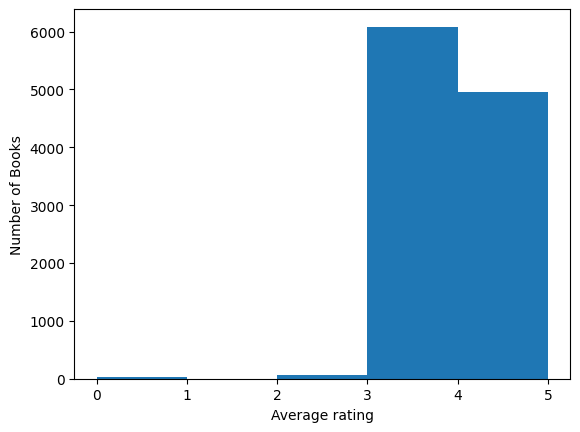

In [36]:
# Histogramm for average rating
print('As confirmed earlier, about 50 percentile books have a rating close 4.0.')
plt.hist(books_new.average_rating,bins=5)
plt.xlabel("Average rating")
plt.ylabel("Number of Books")
plt.show()



It is clear that almost all books are from English language. Also, the other peaks also belong to American and British English. The fourth language in which most books are published in the list is Spanish followed by French and German.


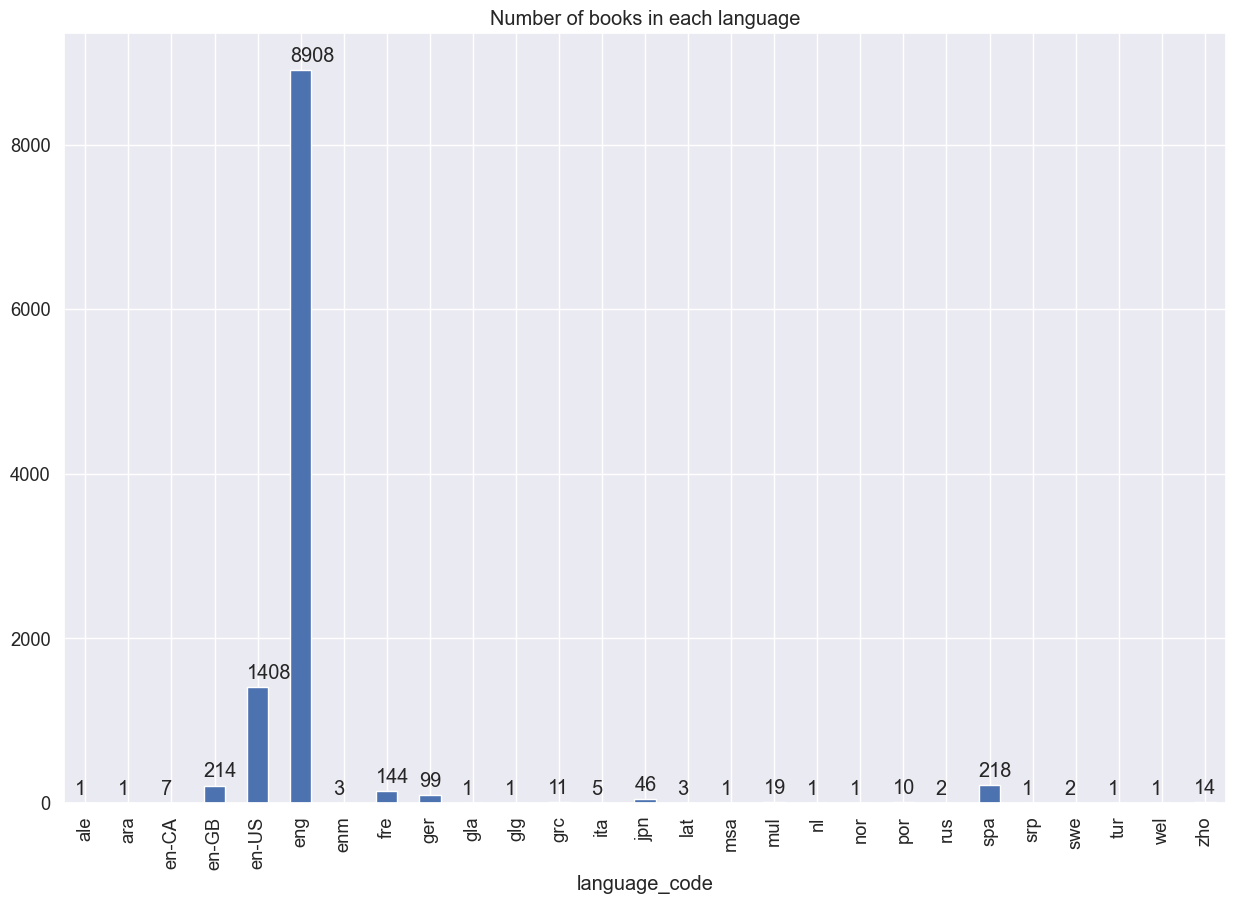

In [37]:
# Number of books for languages

print('It is clear that almost all books are from English language. Also, the other peaks also belong to American and British English. The fourth language in which most books are published in the list is Spanish followed by French and German.')

sns.set(font_scale=1.2)
plt.figure(figsize=(15,10))
ax = books_new.groupby('language_code')['title'].count().plot.bar()
plt.title('Number of books in each language')
for p in ax.patches: ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()+100))

Highly rated authors
Last quartile for average ratings starts at 4.14. So, any author having number of books can be called prolific. Let's explore which authors have highest number of books with more than that 4.14 rating.

It is clear that Rumiko Takahashi is the highest rated author since he or she has 26 books with average ratings in the last quartile.

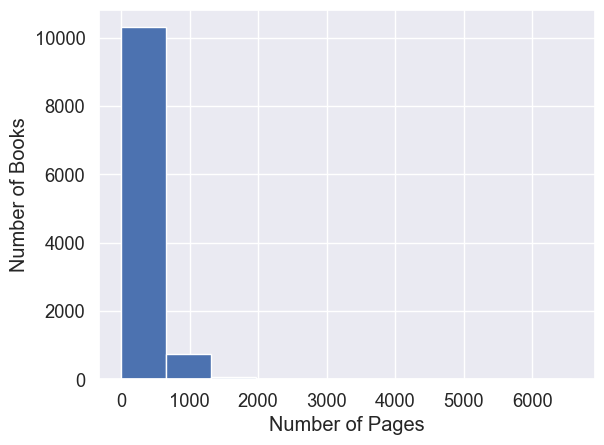

In [42]:
# Histogram for numbers pages

plt.hist(books_new.num_pages,bins=10)
plt.xlabel("Number of Pages")
plt.ylabel("Number of Books")
plt.show()

Interpretation of the "Average Rating" histogram:
the average vote is between 3.5 and 4.5. do we focus the analysis based only on that range?
the "Average Rating" histogram: A reader is likely to give a rating around 4.

Interpretation of the "Numbers Page" histogram:
books with 0 pages will be deleted for better accuracy. That is inconsistent data.

Study Corelation among variables

In [43]:
books_new.corr(method='pearson')

,average_rating,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,0.150477,0.038224,0.033663
num_pages,0.150477,1.000000,0.034337,0.036977
ratings_count,0.038224,0.034337,1.000000,0.865977
text_reviews_count,0.033663,0.036977,0.865977,1.000000


As such it seems that there is hardly any mentionable corelation of any variable with the books ratings. So, it is important to study the individual relation.

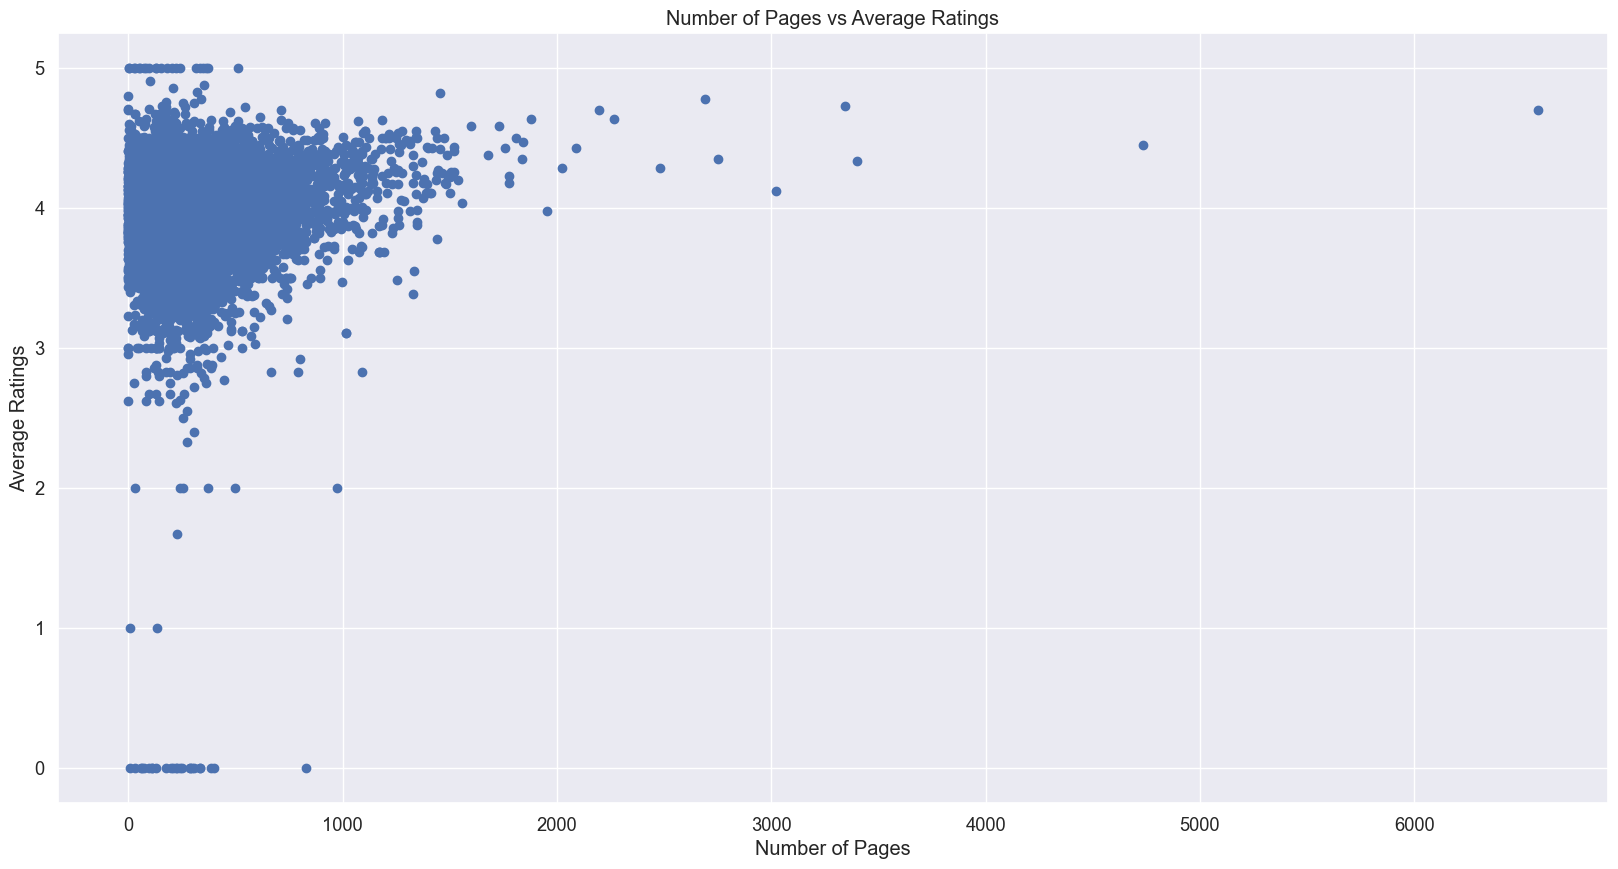

In [44]:
# Relation between number of pages and average ratings

plt.figure(figsize=(20,10))
plt.scatter(books_new.num_pages,books_new.average_rating)
plt.title("Number of Pages vs Average Ratings")
plt.xlabel("Number of Pages")
plt.ylabel("Average Ratings")
plt.show()

In [45]:
books_new = books_new.drop(books_new[(books_new['num_pages'] == 0)].index)

In [48]:
books_new.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11047.000000,11047.000000,1.104700e+04,11047.000000
mean,3.934135,338.719924,1.806368e+04,545.676021
std,0.350276,240.355399,1.128759e+05,2585.092278
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3.770000,196.000000,1.090000e+02,9.000000
50%,3.960000,301.000000,7.620000e+02,47.000000
75%,4.130000,416.000000,5.048000e+03,241.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


In [49]:
books_new.shape
print('remaining books :', books_new.shape)

remaining books : (11047, 9)


Prediction Model :
Ratings are continuous values so we'll choose Regression instead of Classification reserved for categorical target



finding correlations between numerical features

In [50]:
# the correlation between numerical columns

books_new.corr()

,average_rating,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,0.151865,0.038357,0.033773
num_pages,0.151865,1.000000,0.033064,0.035254
ratings_count,0.038357,0.033064,1.000000,0.865955
text_reviews_count,0.033773,0.035254,0.865955,1.000000


comments: 
The highest correlation exists between 'text_reviews_count' and 'ratings_count',
while the lowest correlation is between 'average_rating' and num_pages 

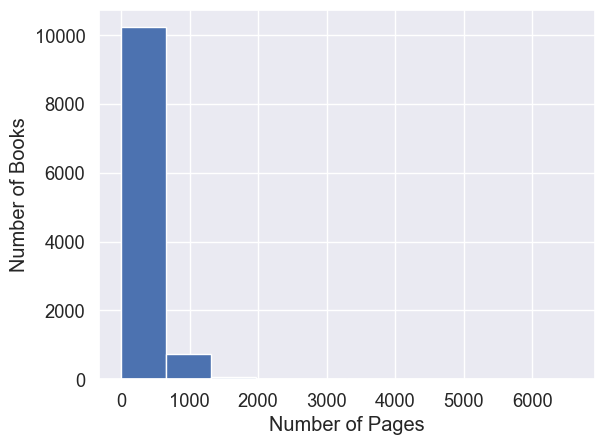

In [51]:
# Distribution Plot for the Number of Pages
plt.hist(books_new.num_pages,bins=10)
plt.xlabel("Number of Pages")
plt.ylabel("Number of Books")
plt.show()

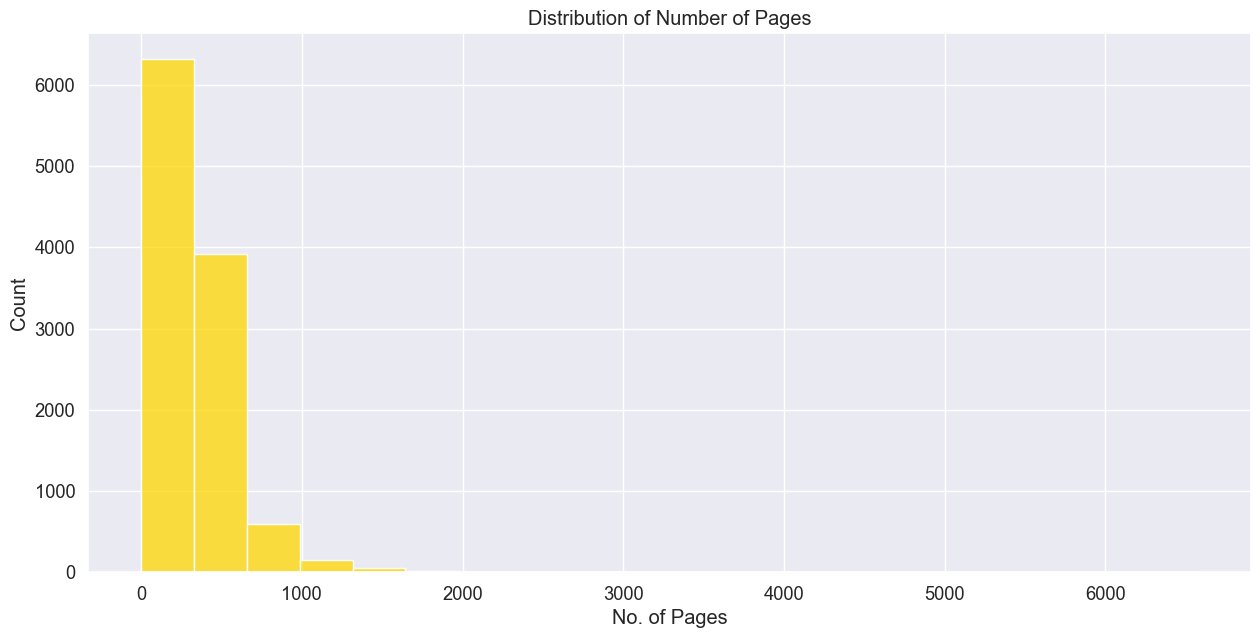

In [52]:
plt.figure(figsize=(15,7))
sns.histplot(books_new['num_pages'],bins=20,color='gold')
plt.title('Distribution of Number of Pages')
plt.xlabel('No. of Pages')
plt.show()

 Since we want to build a linear regression model, let's look for a few independent variables that have a significant correlation with average ratings

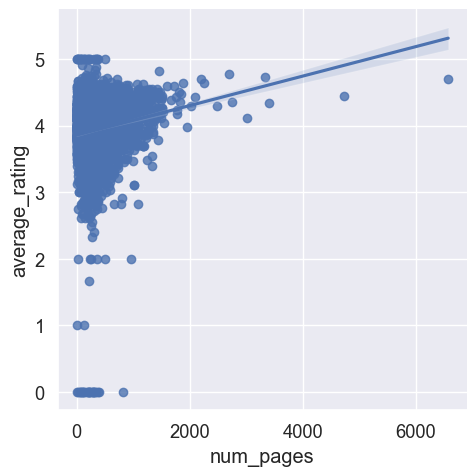

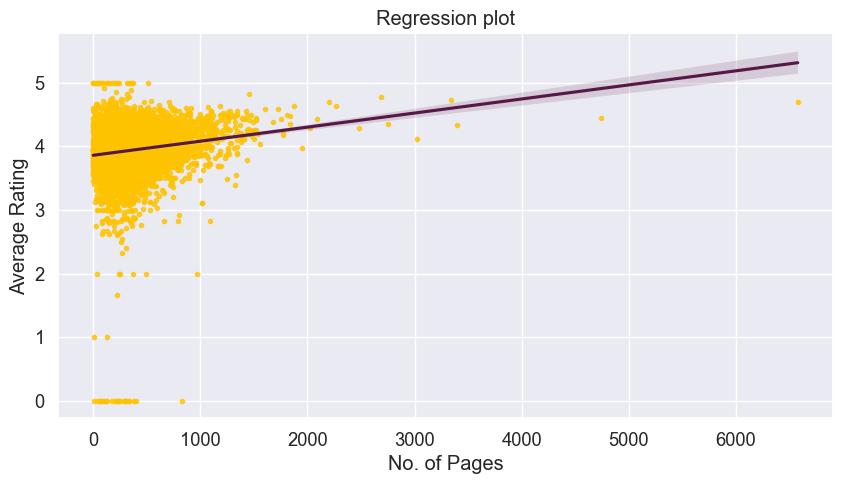

In [53]:
# We can use the regplot() method from seaborn to see the relationship between num_pages and 'average_rating'
sns.lmplot(x = 'num_pages', y = 'average_rating', data = books_new)

plt.figure(figsize=(10,5))
sns.regplot(data=books_new,y="average_rating",x="num_pages",marker='.',scatter_kws={"color": "#FFC300"}, line_kws={"color": "#581845"})
plt.xlabel('No. of Pages')
plt.ylabel('Average Rating')
plt.title("Regression plot")
plt.show()

 From the preceding heatmap, num_pages ( The number of pages the book contains) has the higest positive correlation with average_rating ( The average rating of the book received in total.), so we will take num_pages as a feature (X) and average_rating as a predictor (y) for our linear regression model.



Graphic to show outliers points.

<AxesSubplot: xlabel='num_pages'>

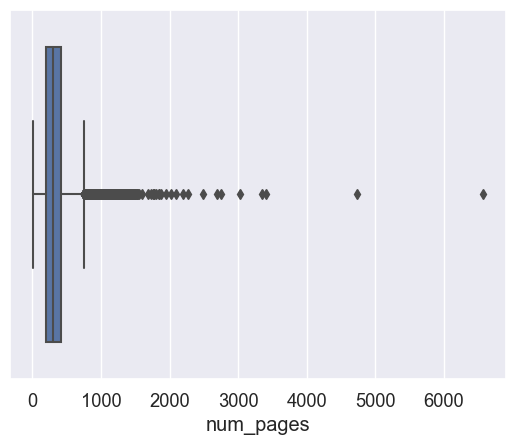

In [54]:
# find no. of pages outliers
sns.boxplot(x=books_new['num_pages'])

Above plot shows points between 1,000 to 6,000, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.


In [55]:
# remove outliers from no. of pages to have a more accurate datase
books_new_outliers = books_new.drop(books_new.index[books_new['num_pages'] >= 1000])

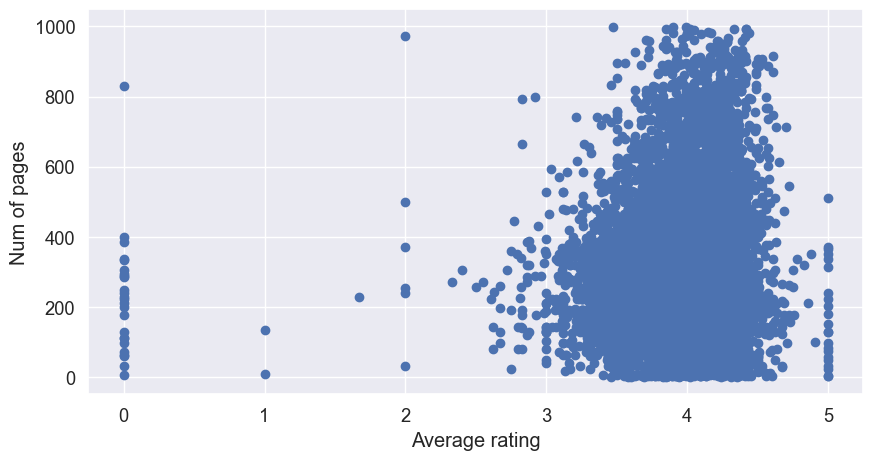

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(books_new_outliers.average_rating,books_new_outliers.num_pages)
plt.xlabel("Average rating")
plt.ylabel("Num of pages")
plt.show()

English language is everywhere on the graph, meaning that a lot more diverse votes have been allocated for that language. But this one is concentrated on the range of 3.5 and 4.5. We clearly see that for any language, the voting range remains between 3.5 and 4.5.

the above plot is the new distribution after removing outliers

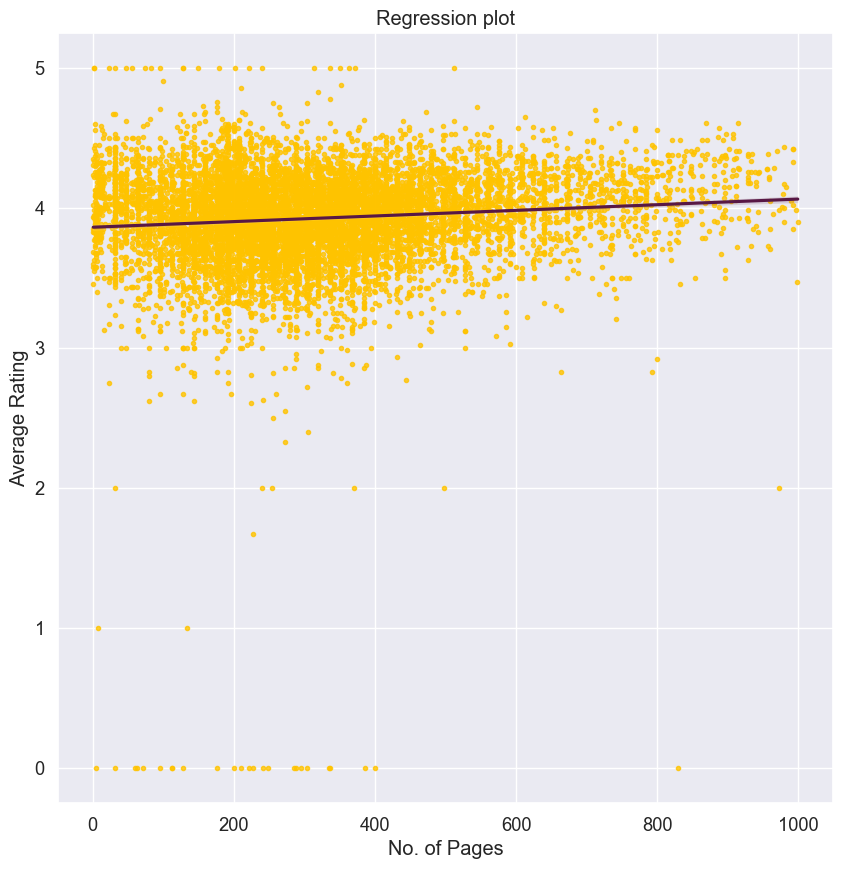

In [57]:
plt.figure(figsize=(10,10))
sns.regplot(data=books_new_outliers,y="average_rating",x="num_pages",marker='.',scatter_kws={"color": "#FFC300"}, line_kws={"color": "#581845"})
plt.xlabel('No. of Pages')
plt.ylabel('Average Rating')
plt.title("Regression plot")
plt.show()

<AxesSubplot:xlabel='ratings_count'>

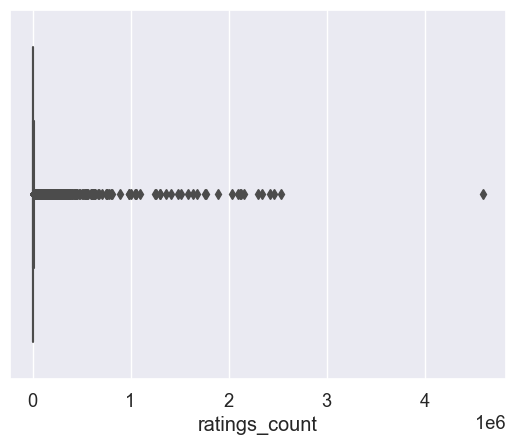

In [62]:
# find no.from ratings_count
sns.boxplot(x=books_new_outliers['ratings_count'])

In [58]:
# remove outliers from ratings_count
books_new_outliers2 = books_new_outliers.drop(books_new_outliers.index[books_new_outliers['ratings_count'] >= 1000000])

<AxesSubplot: xlabel='ratings_count'>

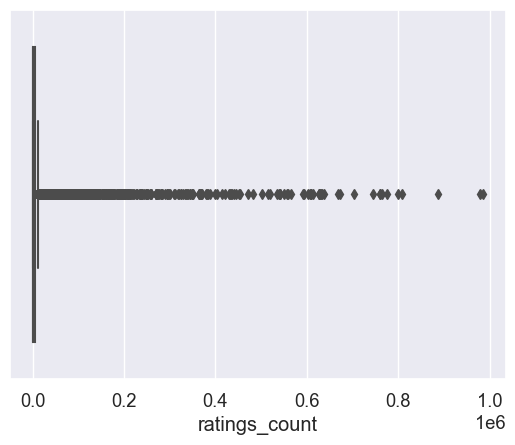

In [59]:
sns.boxplot(x=books_new_outliers2['ratings_count'])

<AxesSubplot: xlabel='text_reviews_count'>

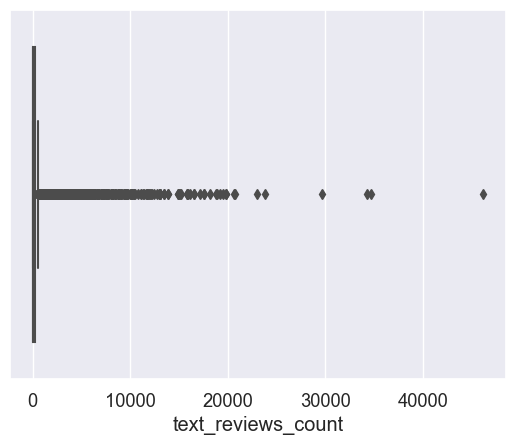

In [60]:
# find no.from text_reviews_count
sns.boxplot(x=books_new_outliers2['text_reviews_count'])

In [61]:
# remove outliers from text_reviews_count
books_new_outliers3 = books_new_outliers2.drop(books_new_outliers2.index[books_new_outliers2['text_reviews_count'] >= 20000])

In [62]:
books_new_outliers3.corr()["average_rating"]

average_rating        1.000000
num_pages             0.102924
ratings_count         0.051829
text_reviews_count    0.039737
Name: average_rating, dtype: float64

The correlation with other feature is almost inexistant encoding categorical variable and formating feature may be a way to solve this issue. 

In [63]:
books_new_outliers3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10792 entries, 4 to 45641
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10792 non-null  object 
 1   authors             10792 non-null  object 
 2   average_rating      10792 non-null  float64
 3   language_code       10792 non-null  object 
 4   num_pages           10792 non-null  int64  
 5   ratings_count       10792 non-null  int64  
 6   text_reviews_count  10792 non-null  int64  
 7   publication_date    10792 non-null  object 
 8   publisher           10792 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 843.1+ KB


'title', 'authors' , 'publication_date', language_code', 'publisher' are categoricals variables. 

In [64]:
books_transformation = books_new_outliers3.copy()

In [65]:
#Change the publication date to float

books_transformation['publication_date']=pd.to_datetime(books_transformation['publication_date'],format = '%m/%d/%Y',errors='coerce')
books_transformation['publication_date'] = pd.to_numeric(books_transformation['publication_date'])

In [66]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

books_transformation['title'] = le.fit_transform(books_transformation['title'])
books_transformation['authors'] = le.fit_transform(books_transformation['authors'])
books_transformation['language_code'] = le.fit_transform(books_transformation['language_code'])
books_transformation['publisher'] = le.fit_transform(books_transformation['publisher'])

In [67]:
books_transformation.corr()["average_rating"].sort_values(ascending=False)

average_rating        1.000000
num_pages             0.102924
ratings_count         0.051829
text_reviews_count    0.039737
language_code         0.033625
publisher             0.028266
title                 0.021476
authors               0.019323
publication_date     -0.030611
Name: average_rating, dtype: float64

In [68]:
books_transformation.corr()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
title,1.000000,0.028107,0.021476,-0.038840,0.004066,-0.004107,-0.008214,0.000928,0.027635
authors,0.028107,1.000000,0.019323,-0.001355,-0.001365,0.006417,-0.015057,0.003304,0.036574
average_rating,0.021476,0.019323,1.000000,0.033625,0.102924,0.051829,0.039737,-0.030611,0.028266
language_code,-0.038840,-0.001355,0.033625,1.000000,0.031315,-0.023347,-0.036639,0.022851,0.019572
num_pages,0.004066,-0.001365,0.102924,0.031315,1.000000,0.058882,0.067072,-0.013829,0.010983
ratings_count,-0.004107,0.006417,0.051829,-0.023347,0.058882,1.000000,0.859193,0.053337,-0.004155
text_reviews_count,-0.008214,-0.015057,0.039737,-0.036639,0.067072,0.859193,1.000000,0.080061,0.005162
publication_date,0.000928,0.003304,-0.030611,0.022851,-0.013829,0.053337,0.080061,1.000000,-0.009175
publisher,0.027635,0.036574,0.028266,0.019572,0.010983,-0.004155,0.005162,-0.009175,1.000000


In [69]:
books_transformation.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
4,2997,2558,4.42,5,352,6333,244,1067644800000000000,1752
9,9444,6157,3.74,4,152,19,1,1114473600000000000,1353
12,8890,1438,4.38,5,815,3628,254,1130803200000000000,781
13,8889,1438,4.38,5,815,249558,4080,1020124800000000000,518
14,7616,1438,4.22,5,215,4930,460,1091491200000000000,464


there is no additional correlations

In [70]:
books_new_outliers3['language_code']

bookID
4          eng
9        en-US
12         eng
13         eng
14         eng
         ...  
45631      eng
45633      eng
45634      eng
45639      eng
45641      spa
Name: language_code, Length: 10792, dtype: object

In [71]:
books_new_outliers3['language_code'].isna().sum()

0

In [72]:
#  list of different languages assigned to books without duplicates
books_new_outliers3['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'en-CA',
       'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp', 'ita',
       'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'enm', 'tur', 'gla',
       'ale'], dtype=object)

In [73]:
# the number of books per language.
books_new_outliers3['language_code'].value_counts()

eng      8627
en-US    1375
spa       216
en-GB     208
fre       141
ger        95
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
lat         3
rus         2
swe         2
nl          1
srp         1
ara         1
msa         1
glg         1
wel         1
nor         1
enm         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

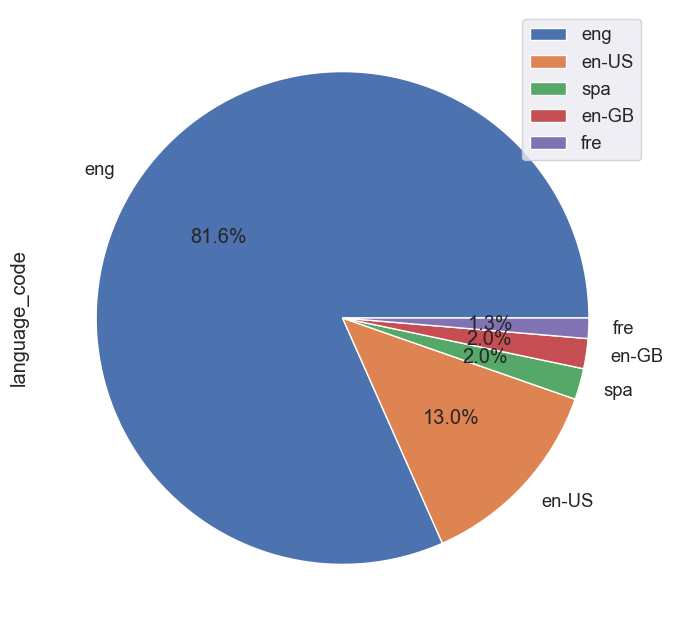

In [74]:
books_new_outliers3['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()


Over 95% of books are in English, which means this variable is nearly constant!

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'eng'),
  Text(1, 0, 'en-US'),
  Text(2, 0, 'fre'),
  Text(3, 0, 'spa'),
  Text(4, 0, 'en-GB'),
  Text(5, 0, 'mul'),
  Text(6, 0, 'grc'),
  Text(7, 0, 'en-CA'),
  Text(8, 0, 'ger'),
  Text(9, 0, 'jpn'),
  Text(10, 0, 'ara'),
  Text(11, 0, 'nl'),
  Text(12, 0, 'zho'),
  Text(13, 0, 'lat'),
  Text(14, 0, 'por'),
  Text(15, 0, 'srp'),
  Text(16, 0, 'ita'),
  Text(17, 0, 'rus'),
  Text(18, 0, 'msa'),
  Text(19, 0, 'glg'),
  Text(20, 0, 'wel'),
  Text(21, 0, 'swe'),
  Text(22, 0, 'nor'),
  Text(23, 0, 'enm'),
  Text(24, 0, 'tur'),
  Text(25, 0, 'gla'),
  Text(26, 0, 'ale')])

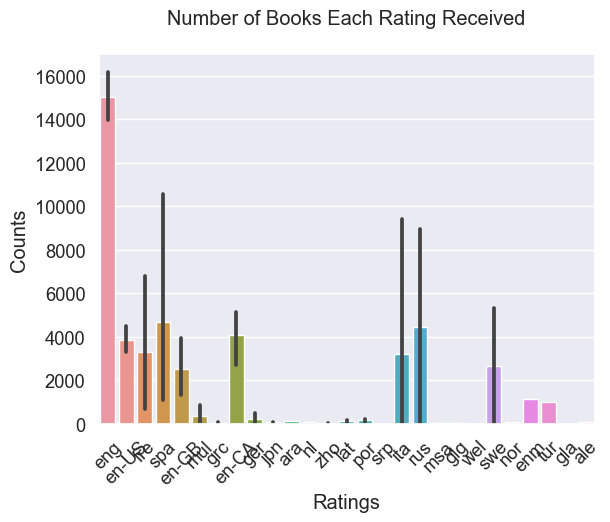

In [75]:
sns.barplot(data=books_new_outliers3 , x="language_code", y="ratings_count")
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

In [76]:
# top 5 most used languages:
books_new_outliers3['language_code'].value_counts().head()

eng      8627
en-US    1375
spa       216
en-GB     208
fre       141
Name: language_code, dtype: int64

In [77]:
books_CountValueLang = books_new_outliers3['language_code'].value_counts(normalize = True).head()
books_CountValueLang

eng      0.799388
en-US    0.127409
spa      0.020015
en-GB    0.019274
fre      0.013065
Name: language_code, dtype: float64

Model Performing

we only keep columns where average_ratings is correlated: num_pages, text_review_counts, and ratings_count.

In [78]:
books_transformation.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
4,2997,2558,4.42,5,352,6333,244,1067644800000000000,1752
9,9444,6157,3.74,4,152,19,1,1114473600000000000,1353
12,8890,1438,4.38,5,815,3628,254,1130803200000000000,781
13,8889,1438,4.38,5,815,249558,4080,1020124800000000000,518
14,7616,1438,4.22,5,215,4930,460,1091491200000000000,464


In [79]:
# Copy of the data frame
books_Model = books_transformation.copy()
# delete unused columns 
# divide the data into attributes and labels
X = books_Model .drop(['title', 'authors', 'language_code','publisher'],  axis = 1)
y = books_Model ['average_rating']

In [80]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =60)

In [81]:
X_train.shape

(8633, 5)

In [82]:
X_test.shape

(2159, 5)

In [83]:
print(books_transformation.average_rating.mean())
print(X_train.average_rating.mean())
print(X_test.average_rating.mean())

3.928132876204578
3.926822657245459
3.9333719314497375


In [84]:
print(books_transformation.ratings_count.mean())
print(X_train.ratings_count.mean())
print(X_test.ratings_count.mean())

12701.569217939214
12803.829143982393
12292.671607225568


In [85]:
print(books_transformation.text_reviews_count.mean())
print(X_train.text_reviews_count.mean())
print(X_test.text_reviews_count.mean())

432.6673461823573
438.7376346577088
408.3946271421955


In [86]:
X_trainb = X_train.loc[:,['num_pages','ratings_count','text_reviews_count','publication_date']].values
y_trainb = X_train.average_rating.values

In [87]:
X_testb = X_test.loc[:,['num_pages','ratings_count','text_reviews_count','publication_date']].values
y_testb = X_test.average_rating.values

Linear Regression Model

In [88]:
from sklearn.linear_model import LinearRegression

# regression model
lr_model = LinearRegression()
# Fitting the training data to our model
lr_model.fit(X_trainb,y_trainb)

LinearRegression()

In [89]:
# prediction for the test data set.
y_testb_predicted_lr = lr_model.predict(X_testb)

Mean Squared Error Model

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
# calculate the error between predictions values and the reals values.
print('Linear Regression Report')
print('MAE: ' + str(mean_absolute_error(y_testb,y_testb_predicted_lr)))
print('MSE: ' + str(mean_squared_error(y_testb,y_testb_predicted_lr)))
print('R^2: ' + str(r2_score(y_testb,y_testb_predicted_lr)))

Linear Regression Report
MAE: 0.22093265352487723
MSE: 0.11251287255824548
R^2: 0.00963944812888795


Decision Tree Model

In [93]:
from sklearn.tree import DecisionTreeRegressor

DT_reg = DecisionTreeRegressor()
DT_reg.fit(X_trainb,y_trainb)

DecisionTreeRegressor()

In [94]:
y_testb_predicted_dt = DT_reg.predict(X_testb)

In [95]:
print('Decision Tree Report')
print('MAE: ' + str(mean_absolute_error(y_testb,y_testb_predicted_dt)))
print('MSE: ' + str(mean_squared_error(y_testb,y_testb_predicted_dt)))
print('R^2: ' + str(r2_score(y_testb,y_testb_predicted_dt)))

Decision Tree Report
MAE: 0.2976609541454377
MSE: 0.17120254747568317
R^2: -0.506958675434976


Random Forest Regression Model

In [97]:
#Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor()
RF_reg.fit(X_trainb,y_trainb)

RandomForestRegressor()

In [98]:
y_testb_predicted_rf = RF_reg.predict(X_testb)

In [99]:
print('Random Forest Regressor Report')
print('MAE: ' + str(mean_absolute_error(y_testb,y_testb_predicted_rf)))
print('MSE: ' + str(mean_squared_error(y_testb,y_testb_predicted_rf)))
print('R^2: ' + str(r2_score(y_testb,y_testb_predicted_rf)))

Random Forest Regressor Report
MAE: 0.21829851783232979
MSE: 0.10134869297359889
R^2: 0.10790876437014774


In [101]:
# Lasso Regression Model
from sklearn.linear_model import Lasso

Lasso_reg = Lasso()
Lasso_reg.fit(X_trainb,y_trainb)

Lasso()

In [102]:
y_testb_predicted_las = Lasso_reg.predict(X_testb)

In [103]:
print('Lasso Regressor Report')
print('MAE: ' + str(mean_absolute_error(y_testb,y_testb_predicted_las)))
print('MSE: ' + str(mean_squared_error(y_testb,y_testb_predicted_las)))
print('R^2: ' + str(r2_score(y_testb,y_testb_predicted_las)))

Lasso Regressor Report
MAE: 0.22110274791943965
MSE: 0.11245198393252674
R^2: 0.010175401852211996
